In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
com_df = pd.read_csv("results/mapequation_com_entropy_G.csv", index_col=0)
com_df = com_df[["node"]+[ col for col in com_df.columns if "_ent_" in col ]]
com_df.head()

,node,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
ind,,,,,
0,NEWTON CIRCUS,0.660688,0.618028,0.649526,0.595412
1,BOULEVARD,0.778886,0.751121,0.780433,0.728454
2,CHINATOWN,0.746530,0.754246,0.714408,0.728074
3,MOULMEIN,0.744090,0.732001,0.710449,0.652052
4,CITY HALL,0.759932,0.761807,0.763656,0.770766


In [4]:
core_df = pd.read_csv("results/k_shell_decomposition_result_entropy.csv", index_col=0)
core_df = core_df[["node"]+[ col for col in core_df.columns if "_ent_" in col ]]
core_df.head()

,node,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
ind,,,,,
0,ADMIRALTY,0.990890,0.771334,0.999949,0.783552
1,AIRPORT ROAD,0.665975,0.100550,0.683295,0.324450
2,ALEXANDRA HILL,0.751160,0.617682,0.778628,0.785826
3,ALEXANDRA NORTH,0.962353,0.896500,0.996685,0.961128
4,ALJUNIED,0.320833,0.406824,0.261917,0.468840


In [5]:
node_df = pd.read_csv("results/node_density_stat_normalized.csv", index_col=0)
node_df = node_df.reset_index()
node_df.head()

,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,ADMIRALTY,0.048551,0.036933,0.060612,0.028214,0.028508,0.061199,0.045808,0.067892,0.038888,0.038550
1,AIRPORT ROAD,0.006487,0.006623,0.005869,0.005507,0.005368,0.000287,0.001161,0.000182,0.000832,0.000619
2,ALEXANDRA HILL,0.130663,0.107470,0.135408,0.032508,0.047346,0.132178,0.098367,0.136138,0.039150,0.055265
3,ALEXANDRA NORTH,0.009226,0.015243,0.009854,0.004846,0.001865,0.006561,0.009277,0.006795,0.003378,0.002542
4,ALJUNIED,0.562586,0.544546,0.475933,0.416580,0.477250,0.663674,0.638384,0.547525,0.562194,0.680763


In [6]:
entropy_df = pd.merge(com_df, core_df, left_on="node", right_on="node")
entropy_df.head()

,node,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
0,NEWTON CIRCUS,0.660688,0.618028,0.649526,0.595412,0.188306,0.225681,0.183369,0.190708
1,BOULEVARD,0.778886,0.751121,0.780433,0.728454,0.428556,0.332661,0.438248,0.328086
2,CHINATOWN,0.746530,0.754246,0.714408,0.728074,0.173694,0.416731,0.187989,0.461814
3,MOULMEIN,0.744090,0.732001,0.710449,0.652052,0.275944,0.252602,0.284374,0.273916
4,CITY HALL,0.759932,0.761807,0.763656,0.770766,0.237001,0.364608,0.197243,0.317769


In [7]:
len(entropy_df)

303

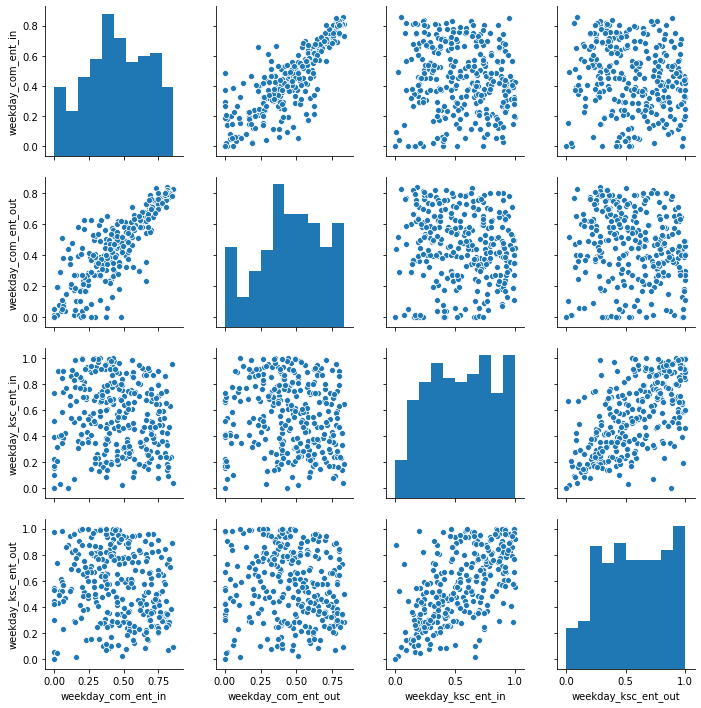

In [8]:
sns.pairplot(entropy_df[[ col for col in entropy_df.columns if "weekday" in col ]])

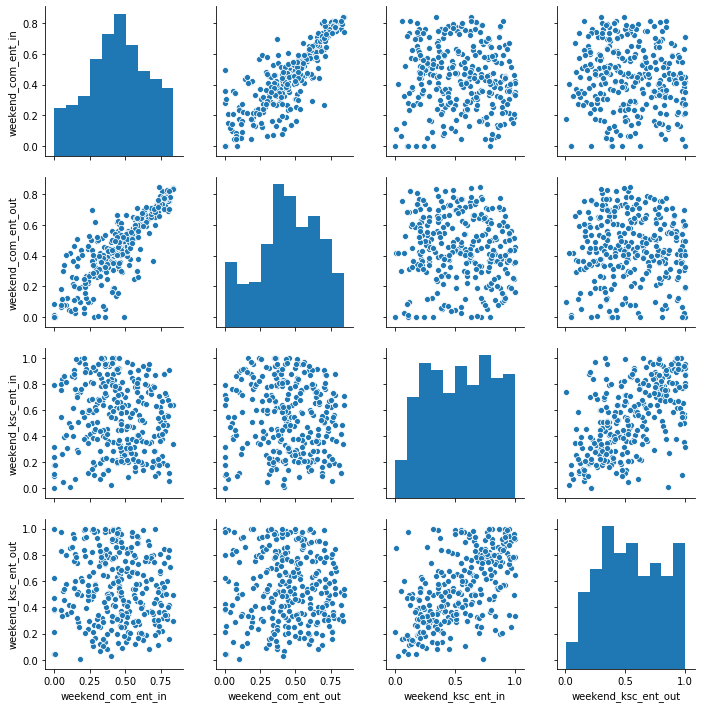

In [9]:
sns.pairplot(entropy_df[[ col for col in entropy_df.columns if "weekend" in col ]])

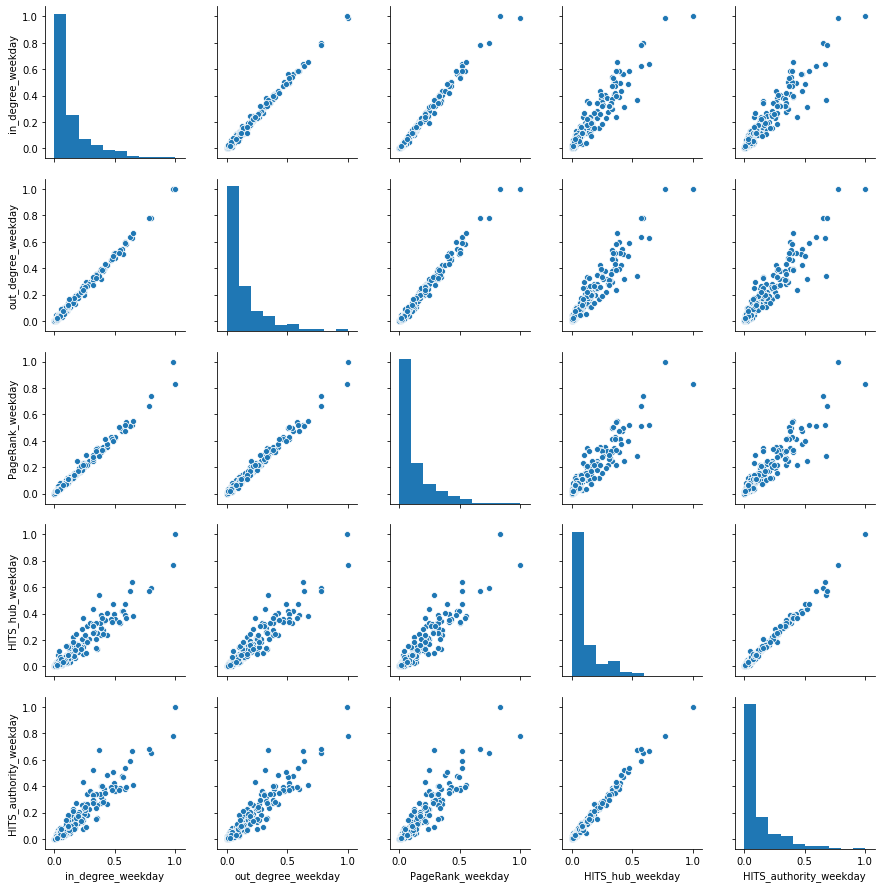

In [10]:
sns.pairplot(node_df[[ col for col in node_df.columns if "weekday" in col ]])

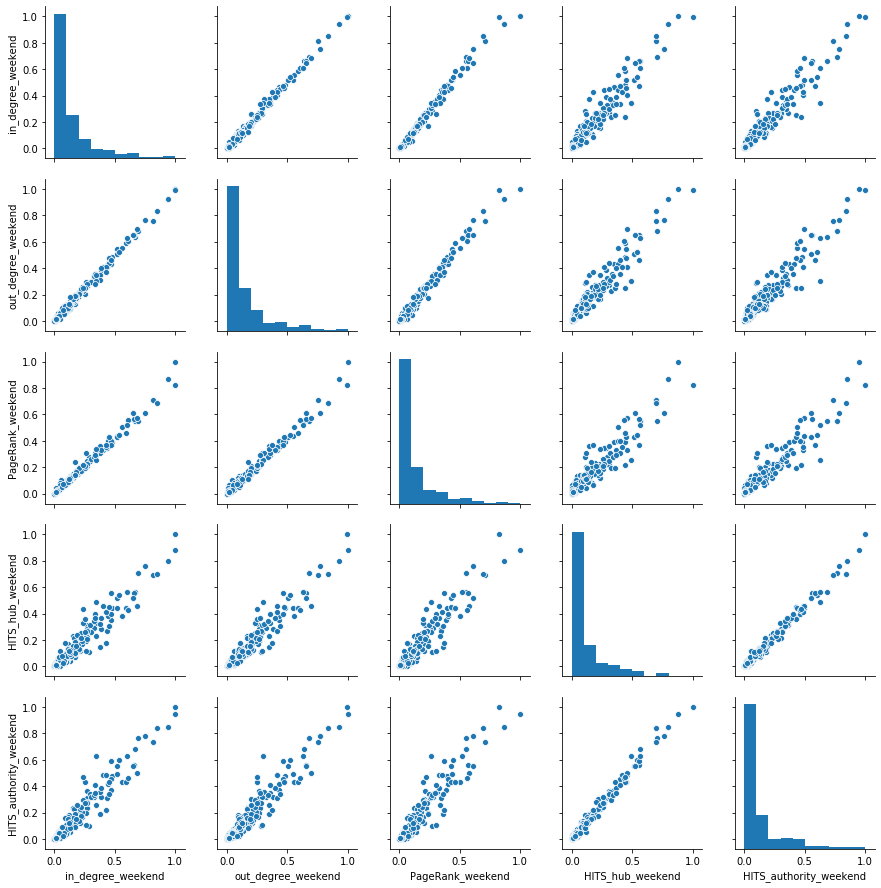

In [11]:
sns.pairplot(node_df[[ col for col in node_df.columns if "weekend" in col ]])

In [8]:
diversity_weekday = entropy_df[["node"]+[ col for col in entropy_df.columns if "weekday" in col ]]
density_weekday = node_df[["node"]+[ col for col in node_df.columns if "weekday" in col ]]
weekday_df = pd.merge(diversity_weekday, density_weekday, left_on="node", right_on="node")
print(len(weekday_df))
weekday_df.head()

303


,node,weekday_com_ent_in,weekday_com_ent_out,weekday_ksc_ent_in,weekday_ksc_ent_out,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday
0,NEWTON CIRCUS,0.660688,0.618028,0.188306,0.225681,0.473507,0.467585,0.410352,0.336515,0.367595
1,BOULEVARD,0.778886,0.751121,0.428556,0.332661,0.566508,0.508501,0.496573,0.422173,0.471683
2,CHINATOWN,0.746530,0.754246,0.173694,0.416731,0.500102,0.513980,0.429078,0.356720,0.396134
3,MOULMEIN,0.744090,0.732001,0.275944,0.252602,0.374174,0.379173,0.314478,0.329896,0.340437
4,CITY HALL,0.759932,0.761807,0.237001,0.364608,0.408676,0.391240,0.344728,0.345254,0.381868


In [9]:
diversity_weekend = entropy_df[["node"]+[ col for col in entropy_df.columns if "weekend" in col ]]
density_weekend = node_df[["node"]+[ col for col in node_df.columns if "weekend" in col ]]
weekend_df = pd.merge(diversity_weekend, density_weekend, left_on="node", right_on="node")
print(len(weekend_df))
weekend_df.head()

303


,node,weekend_com_ent_in,weekend_com_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,NEWTON CIRCUS,0.649526,0.595412,0.183369,0.190708,0.470268,0.462752,0.399245,0.397362,0.457361
1,BOULEVARD,0.780433,0.728454,0.438248,0.328086,0.813004,0.757089,0.705947,0.694495,0.733295
2,CHINATOWN,0.714408,0.728074,0.187989,0.461814,0.514809,0.544474,0.437131,0.444503,0.492649
3,MOULMEIN,0.710449,0.652052,0.284374,0.273916,0.327315,0.337215,0.274058,0.340049,0.334573
4,CITY HALL,0.763656,0.770766,0.197243,0.317769,0.516661,0.504820,0.428431,0.514185,0.550273


In [10]:
weekday_df.columns

Index(['node', 'weekday_com_ent_in', 'weekday_com_ent_out',
       'weekday_ksc_ent_in', 'weekday_ksc_ent_out', 'in_degree_weekday',
       'out_degree_weekday', 'PageRank_weekday', 'HITS_hub_weekday',
       'HITS_authority_weekday'],
      dtype='object')

In [11]:
weekday_spread = weekday_df[['node', 'weekday_com_ent_out', 'weekday_ksc_ent_out', 'out_degree_weekday', 'HITS_hub_weekday', 'PageRank_weekday', ]]
weekend_spread = weekend_df[['node', 'weekend_com_ent_out', 'weekend_ksc_ent_out', 'out_degree_weekend', 'HITS_hub_weekend', 'PageRank_weekend', ]]

In [12]:
weekday_receiv = weekday_df[['node', 'weekday_com_ent_in', 'weekday_ksc_ent_in', 'in_degree_weekday', 'HITS_authority_weekday', 'PageRank_weekday', ]]
weekend_receiv = weekend_df[['node', 'weekend_com_ent_in', 'weekend_ksc_ent_in', 'in_degree_weekend', 'HITS_authority_weekend', 'PageRank_weekend', ]]

In [13]:
weekday_spread_node = weekday_spread["node"]
weekday_spread_1 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["out_degree_weekday"])**(1./3.)
weekday_spread_2 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["HITS_hub_weekday"])**(1./3.)
weekday_spread_3 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["PageRank_weekday"])**(1./3.)

weekday_spread_res = pd.DataFrame({"node": weekday_spread_node, "cal_dc": weekday_spread_1, "cal_hh": weekday_spread_2, "cal_pr": weekday_spread_3})
weekday_spread_res.head()

,node,cal_dc,cal_hh,cal_pr
0,NEWTON CIRCUS,0.402520,0.360719,0.385378
1,BOULEVARD,0.502729,0.472499,0.498768
2,CHINATOWN,0.544634,0.482205,0.512824
3,MOULMEIN,0.412346,0.393649,0.387418
4,CITY HALL,0.477205,0.457724,0.457491


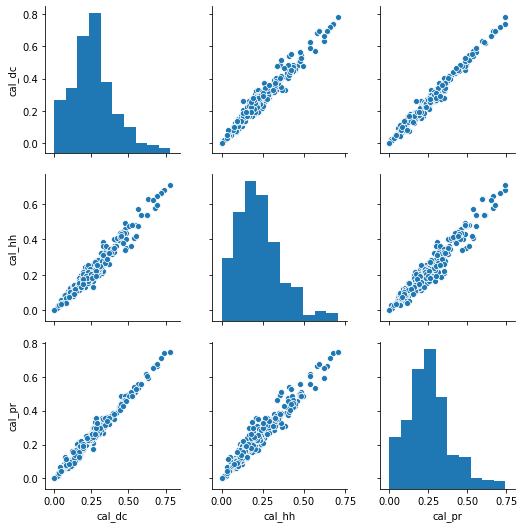

In [16]:
sns.pairplot(weekday_spread_res)

In [19]:
weekday_spread_res.corr()

,cal_dc,cal_hh,cal_pr
cal_dc,1.000000,0.986056,0.994840
cal_hh,0.986056,1.000000,0.978665
cal_pr,0.994840,0.978665,1.000000


In [14]:
weekend_spread_node = weekend_spread["node"]
weekend_spread_1 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["out_degree_weekend"])**(1./3.)
weekend_spread_2 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["HITS_hub_weekend"])**(1./3.)
weekend_spread_3 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["PageRank_weekend"])**(1./3.)

weekend_spread_res = pd.DataFrame({"node": weekend_spread_node, "cal_dc": weekend_spread_1, "cal_hh": weekend_spread_2, "cal_pr": weekend_spread_3})
weekend_spread_res.head()

,node,cal_dc,cal_hh,cal_pr
0,NEWTON CIRCUS,0.374552,0.356007,0.356568
1,BOULEVARD,0.565604,0.549566,0.552570
2,CHINATOWN,0.567815,0.530688,0.527738
3,MOULMEIN,0.391984,0.393080,0.365803
4,CITY HALL,0.498184,0.501246,0.471670


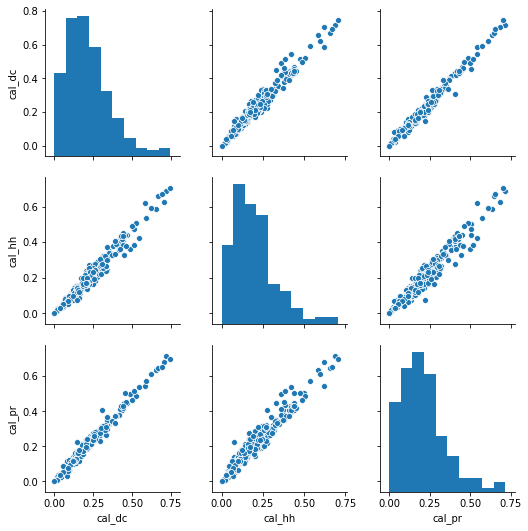

In [21]:
sns.pairplot(weekend_spread_res)

In [22]:
weekend_spread_res.corr()

,cal_dc,cal_hh,cal_pr
cal_dc,1.000000,0.983288,0.992490
cal_hh,0.983288,1.000000,0.971922
cal_pr,0.992490,0.971922,1.000000


In [15]:
weekday_receiv_node = weekday_receiv["node"]
weekday_receiv_1 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["in_degree_weekday"])**(1./3.)
weekday_receiv_2 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["HITS_authority_weekday"])**(1./3.)
weekday_receiv_3 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["PageRank_weekday"])**(1./3.)

weekday_receiv_res = pd.DataFrame({"node": weekday_receiv_node, "cal_dc": weekday_receiv_1, "cal_ha": weekday_receiv_2, "cal_pr": weekday_receiv_3})
weekday_receiv_res.head()

,node,cal_dc,cal_ha,cal_pr
0,NEWTON CIRCUS,0.389101,0.357611,0.370971
1,BOULEVARD,0.573979,0.539979,0.549315
2,CHINATOWN,0.401757,0.371728,0.381759
3,MOULMEIN,0.425115,0.411934,0.401186
4,CITY HALL,0.419084,0.409713,0.395974


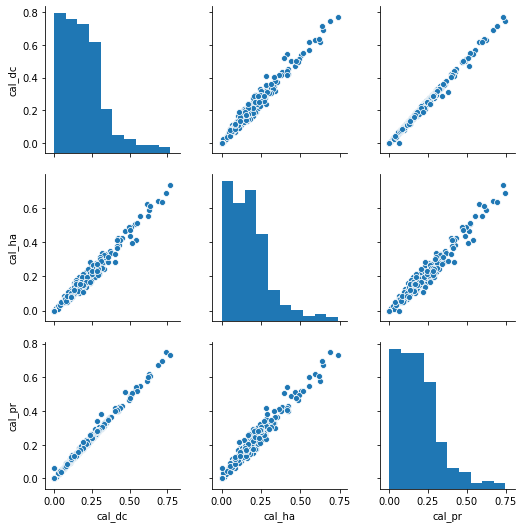

In [24]:
sns.pairplot(weekday_receiv_res)

In [25]:
weekday_receiv_res.corr()

,cal_dc,cal_ha,cal_pr
cal_dc,1.000000,0.986710,0.997344
cal_ha,0.986710,1.000000,0.980337
cal_pr,0.997344,0.980337,1.000000


In [16]:
weekend_receiv_node = weekend_receiv["node"]
weekend_receiv_1 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["in_degree_weekend"])**(1./3.)
weekend_receiv_2 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["HITS_authority_weekend"])**(1./3.)
weekend_receiv_3 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["PageRank_weekend"])**(1./3.)

weekend_receiv_res = pd.DataFrame({"node": weekend_receiv_node, "cal_dc": weekend_receiv_1, "cal_ha": weekend_receiv_2, "cal_pr": weekend_receiv_3})
weekend_receiv_res.head()

,node,cal_dc,cal_ha,cal_pr
0,NEWTON CIRCUS,0.382609,0.379077,0.362288
1,BOULEVARD,0.652704,0.630635,0.622696
2,CHINATOWN,0.410432,0.404457,0.388654
3,MOULMEIN,0.404386,0.407353,0.381143
4,CITY HALL,0.426942,0.436006,0.401107


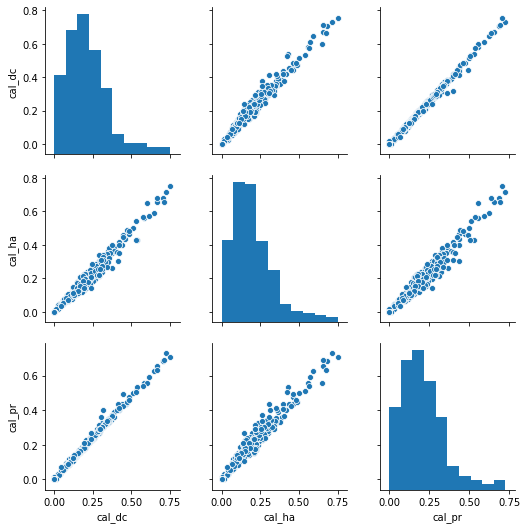

In [27]:
sns.pairplot(weekend_receiv_res)

In [28]:
weekend_receiv_res.corr()

,cal_dc,cal_ha,cal_pr
cal_dc,1.000000,0.983704,0.996689
cal_ha,0.983704,1.000000,0.975618
cal_pr,0.996689,0.975618,1.000000


In [17]:
weekday_res = pd.merge(weekday_spread_res, weekday_receiv_res, left_on="node", right_on="node", suffixes=("_spreader", "_receiver"))
print(len(weekday_res))
weekday_res.head()

303


,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
0,NEWTON CIRCUS,0.402520,0.360719,0.385378,0.389101,0.357611,0.370971
1,BOULEVARD,0.502729,0.472499,0.498768,0.573979,0.539979,0.549315
2,CHINATOWN,0.544634,0.482205,0.512824,0.401757,0.371728,0.381759
3,MOULMEIN,0.412346,0.393649,0.387418,0.425115,0.411934,0.401186
4,CITY HALL,0.477205,0.457724,0.457491,0.419084,0.409713,0.395974


In [18]:
weekend_res = pd.merge(weekend_spread_res, weekend_receiv_res, left_on="node", right_on="node", suffixes=("_spreader", "_receiver"))
print(len(weekend_res))
weekend_res.head()

303


,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
0,NEWTON CIRCUS,0.374552,0.356007,0.356568,0.382609,0.379077,0.362288
1,BOULEVARD,0.565604,0.549566,0.552570,0.652704,0.630635,0.622696
2,CHINATOWN,0.567815,0.530688,0.527738,0.410432,0.404457,0.388654
3,MOULMEIN,0.391984,0.393080,0.365803,0.404386,0.407353,0.381143
4,CITY HALL,0.498184,0.501246,0.471670,0.426942,0.436006,0.401107


In [19]:
weekday_res.to_csv("results/Super_SR_weekday_G.csv", index_label="ind")
weekend_res.to_csv("results/Super_SR_weekend_G.csv", index_label="ind")